In [1]:
# Set the graphs as interactive.
%matplotlib notebook
# Import necessary libraries for initial analysis
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

In [2]:
# Read Data from CSV
sky = pd.read_csv("../data/SDSS_sky_objects.csv", na_values = -9999)

In [3]:
sky.head()

,objid,ra,dec,cx,cy,cz,u,g,r,i,...,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237645879551066262,348.902530,1.271886,0.981059,-0.192431,0.022197,19.38905,18.24496,17.58728,17.20807,...,94,301,6,94,430194949951088640,GALAXY,0.032125,382,51816,368
1,1237645879578460255,51.443695,1.270073,0.623130,0.781804,0.022165,19.52808,17.96541,17.03493,16.53754,...,94,301,6,512,466235292731336704,GALAXY,0.121315,414,51869,410
2,1237645879578460271,51.483584,1.272013,0.622585,0.782237,0.022199,18.72268,17.38520,16.81134,16.51803,...,94,301,6,512,466232818830174208,GALAXY,0.048765,414,51869,401
3,1237645941291614227,49.627485,-1.041769,0.647647,0.761723,-0.018181,17.65612,16.17133,15.58940,15.37850,...,109,301,1,100,1705795582662043648,STAR,-0.000098,1515,52932,208
4,1237645941824356443,40.285690,-0.714957,0.762770,0.646549,-0.012478,17.54884,15.75164,15.03100,14.66728,...,109,301,2,37,459394680333821952,GALAXY,0.040287,408,51821,100


In [4]:
sky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      500000 non-null  int64  
 1   ra         500000 non-null  float64
 2   dec        500000 non-null  float64
 3   cx         500000 non-null  float64
 4   cy         500000 non-null  float64
 5   cz         500000 non-null  float64
 6   u          500000 non-null  float64
 7   g          500000 non-null  float64
 8   r          500000 non-null  float64
 9   i          499998 non-null  float64
 10  z          499996 non-null  float64
 11  run        500000 non-null  int64  
 12  rerun      500000 non-null  int64  
 13  camcol     500000 non-null  int64  
 14  field      500000 non-null  int64  
 15  specobjid  500000 non-null  uint64 
 16  class      500000 non-null  object 
 17  redshift   500000 non-null  float64
 18  plate      500000 non-null  int64  
 19  mjd        500000 non-n

In [5]:
sky.describe()

,objid,ra,dec,cx,cy,cz,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499998.000000,499996.000000,500000.000000,500000.0,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.237659e+18,184.933363,27.014884,-0.418719,-0.060043,0.424506,18.642056,17.416665,16.891806,16.633848,16.475096,3161.691132,301.0,3.493978,189.648856,2.507901e+18,0.172553,2227.379260,53624.334870,343.724822
std,4.684785e+12,69.260517,20.884586,0.544882,0.496256,0.312566,0.829108,0.984974,1.132364,1.210737,1.284765,1090.765336,0.0,1.592935,140.435843,2.313233e+18,0.433517,2054.550641,1477.282544,209.473214
min,1.237646e+18,0.002795,-11.252825,-0.999999,-0.941266,-0.195139,6.752484,7.466997,8.449127,7.652014,6.485586,94.000000,301.0,1.000000,11.000000,2.994897e+17,-0.004268,266.000000,51578.000000,1.000000
25%,1.237655e+18,146.692310,7.245547,-0.753190,-0.499613,0.126122,18.224370,16.864400,16.209560,15.879210,15.636370,2305.000000,301.0,2.000000,84.000000,1.074160e+18,0.000037,954.000000,52577.000000,169.000000
50%,1.237661e+18,186.625068,29.693046,-0.564698,-0.069041,0.495353,18.873785,17.531250,16.916505,16.621025,16.446370,3530.000000,301.0,4.000000,156.000000,1.887151e+18,0.051114,1676.000000,53228.000000,337.000000
75%,1.237662e+18,225.315192,43.802004,-0.370541,0.355873,0.692168,19.270980,18.060440,17.585690,17.339057,17.226120,3927.000000,301.0,5.000000,254.000000,2.880065e+18,0.097840,2558.000000,54507.000000,503.000000
max,1.237666e+18,359.998882,79.742295,1.000000,0.999761,0.984017,19.600000,19.996050,33.209920,32.349170,30.846780,4858.000000,301.0,6.000000,817.000000,1.317774e+19,7.011245,11704.000000,58543.000000,1000.000000


In [6]:
# select only a sample of 5000 objects (1%) in order to plot graphs efficiently
sky_sample = sky.sample(n=5000)

# Plot the sky objects by class

<IPython.core.display.Javascript object>


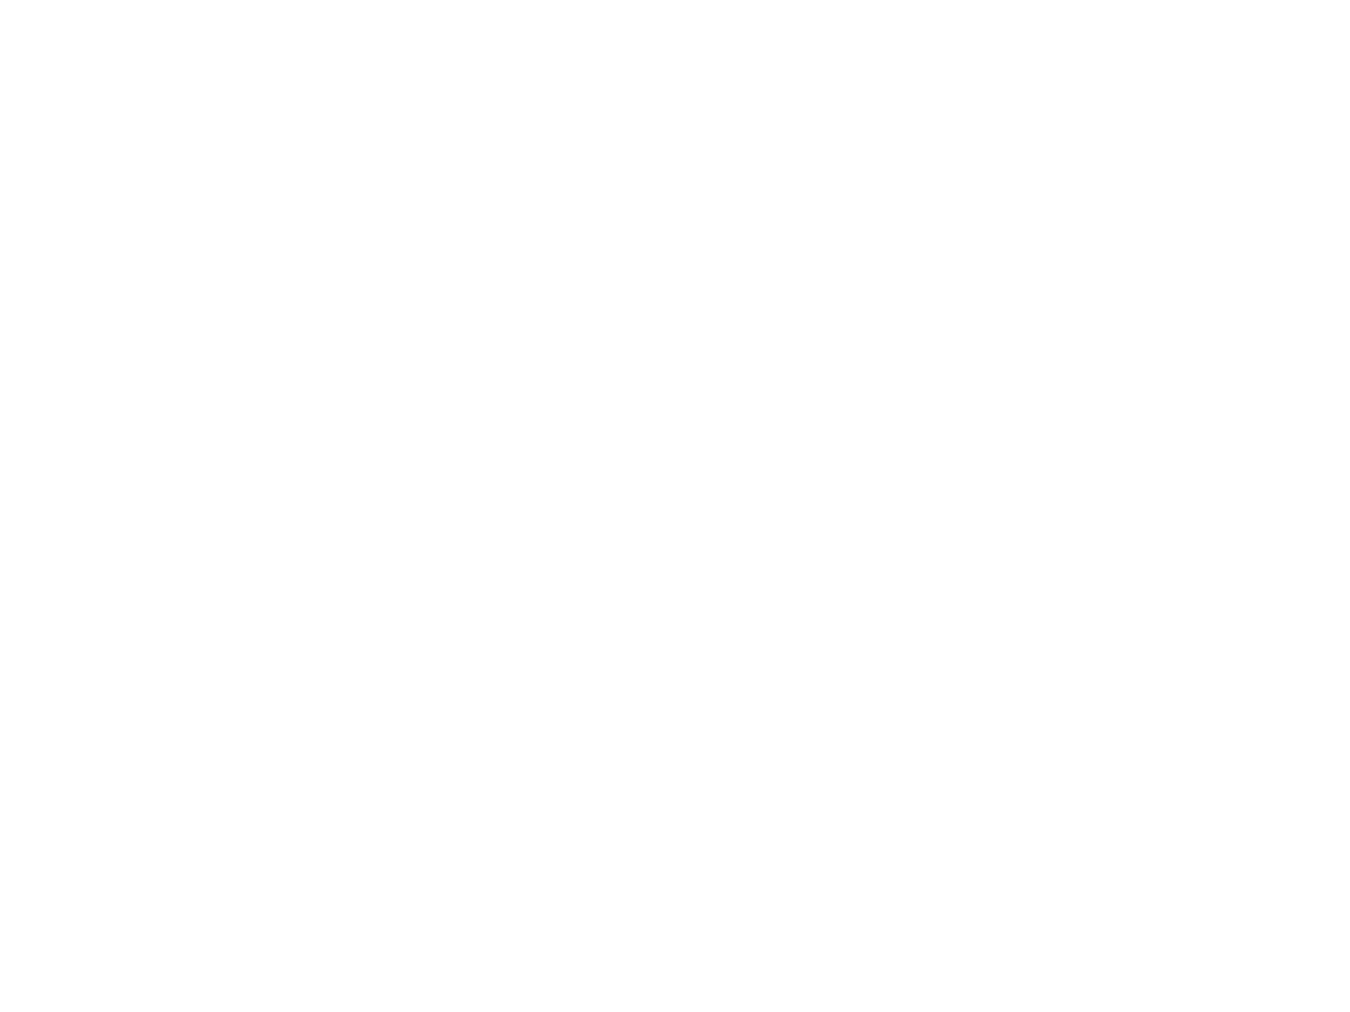

In [7]:
my_cmap = cm.get_cmap('YlOrRd')

# As the colormap YellowOrangeRed has a red value very dark, we truncate the colormap to 0.8 in order to get a lighter red.
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

new_cmap = truncate_colormap(my_cmap,maxval=0.80)

# Set up Figure and 3D Axes 
plt.style.use('dark_background')
fig1 = plt.figure(figsize = (12,9))
ax1 = fig1.add_subplot(111, projection='3d')
# Get some 3D data coordinates
X = sky_sample['cx']
Y = sky_sample['cy']
Z = sky_sample['cz']
# Plot using Axes notation and standard function calls
scatter = ax1.scatter(X, Y, Z, marker = 'o', s = 2, 
           c= sky_sample['class'].replace('STAR',1).replace('GALAXY',2).replace('QSO',3).astype(int),
          label = sky_sample['class'],
                     cmap = new_cmap)
L = ax1.legend(*scatter.legend_elements(),loc="lower left", title="Classes")
L.get_texts()[0].set_text('STAR')
L.get_texts()[1].set_text('GALAXY')
L.get_texts()[2].set_text('QUASAR')
plt.show()

# Plot the sky objects by redshift and location.

In [8]:
#transform redshift to logarithmic
def transform_logarithm(series, k,b):
    for i in range(k):
        if i != 0: 
            series = logseries
        logseries = series.apply(lambda x : math.log((x+0.006)/0.006,b))
    return logseries

sky_sample['logredshift'] = transform_logarithm(sky_sample['redshift'],1,math.e)
# Get some 3D data
X = abs(sky_sample['logredshift']) * sky_sample['dec'].apply(math.radians).apply(math.cos) * sky_sample['ra'].apply(math.radians).apply(math.cos)
Y = abs(sky_sample['logredshift']) * sky_sample['dec'].apply(math.radians).apply(math.cos) * sky_sample['ra'].apply(math.radians).apply(math.sin)
Z = abs(sky_sample['logredshift']) * sky_sample['dec'].apply(math.radians).apply(math.sin)

<IPython.core.display.Javascript object>


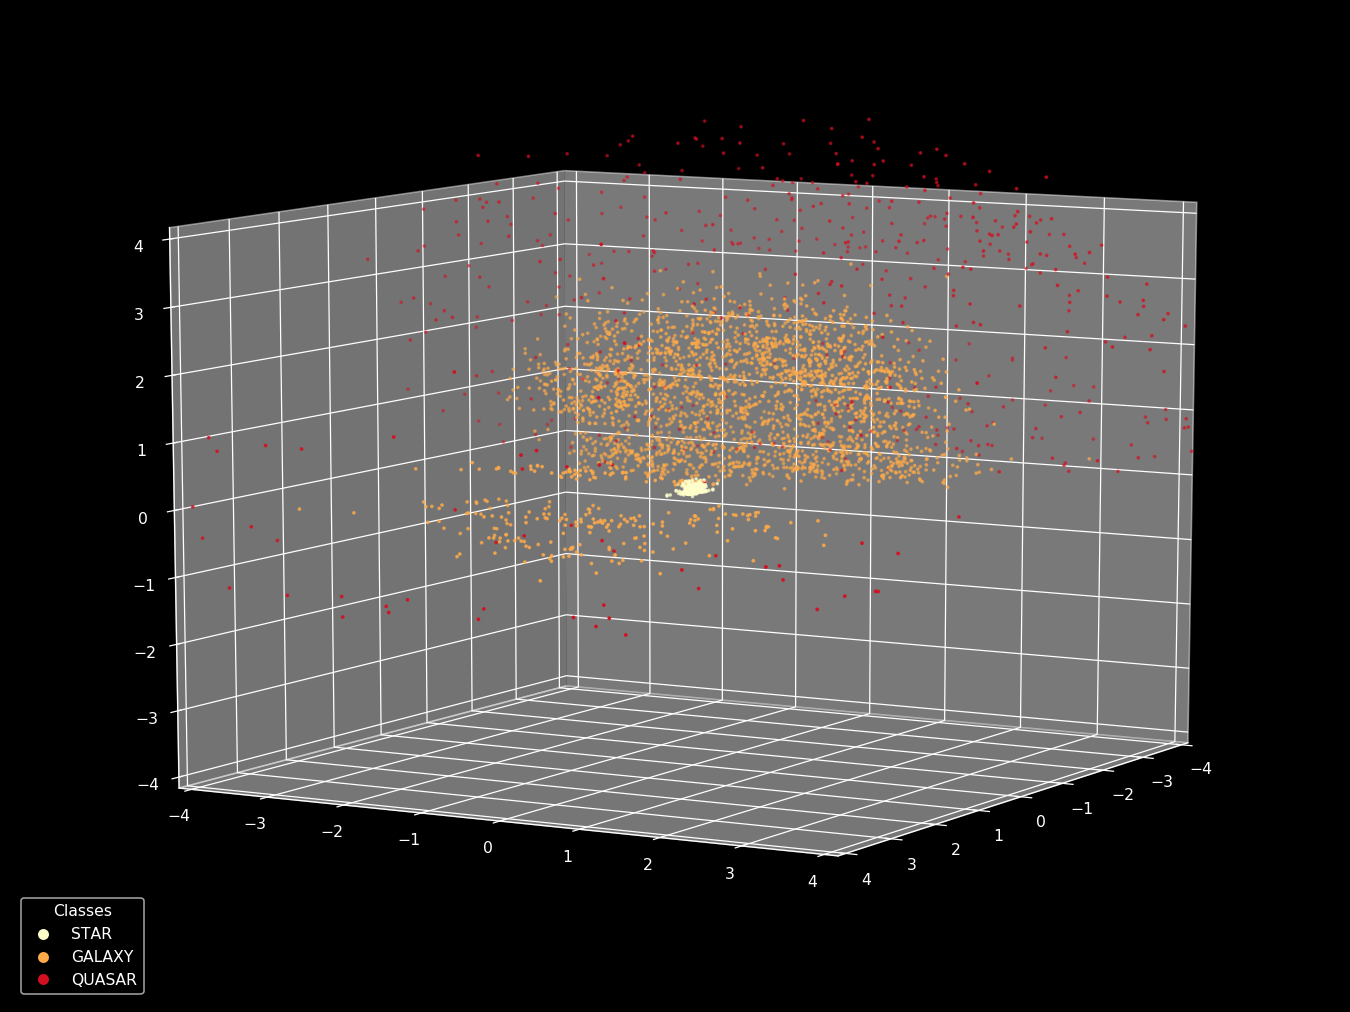

In [9]:
# Close previous figure
plt.close(fig1)
# Set up Figure and 3D Axes 
plt.style.use('dark_background')
fig2 = plt.figure(figsize = (12,9))
fig2.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99)
ax2 = fig2.add_subplot(111, projection='3d')

# Plot using Axes notation and standard function calls
scatter = ax2.scatter(X, Y, Z, marker = 'o', s = 2,
                      c= sky_sample['class'].replace('STAR',1).replace('GALAXY',2).replace('QSO',3).astype(int),
                      label = sky_sample['class'],
                     cmap = new_cmap)
ax2.set_xlim((-4,4))
ax2.set_ylim((-4,4))
ax2.set_zlim((-4,4))
L = ax2.legend(*scatter.legend_elements(),loc="lower left", title="Classes")
L.get_texts()[0].set_text('STAR')
L.get_texts()[1].set_text('GALAXY')
L.get_texts()[2].set_text('QUASAR')
ax2.view_init(10,30)
# plt.axis('off')
plt.show()

# Create an animation with zoom and angle view

## With redshift

KeyboardInterrupt: 

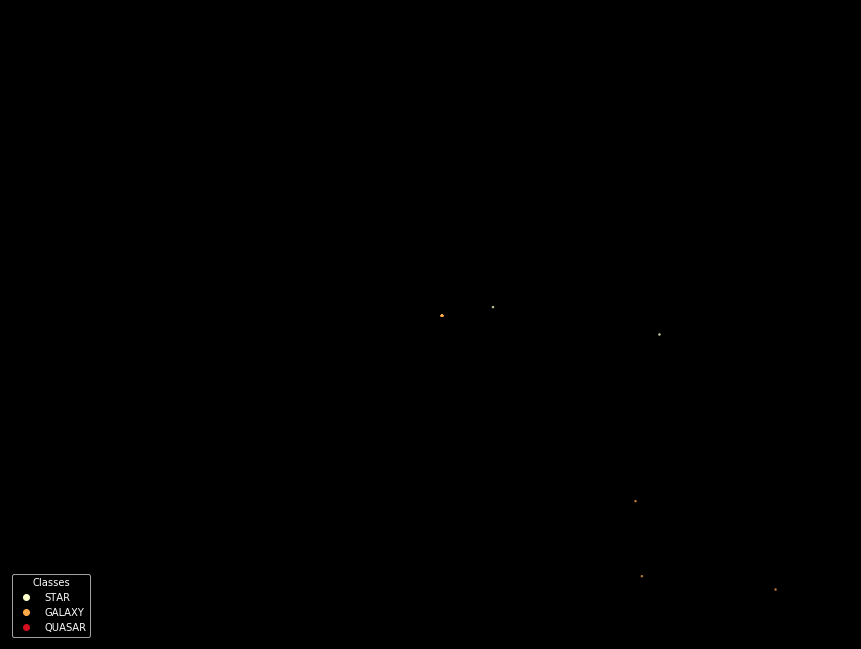

In [10]:
# Close Fig2 and set Matplotlib as inline
plt.close(fig2)
%matplotlib inline
# Set number of seconds of the animation, frames per second, and total frames:
total_seconds_zoom = 30
frames_second = 24
total_frames_zoom = total_seconds_zoom*frames_second
total_frames = 2000

# Set axis_min and axis_max to calculate zoom:
axis_min = 0.00001
axis_max = 5

# Let's create a zoom array (with log):

spacing = (math.log(axis_max) - math.log(axis_min))/total_frames_zoom
max_tilting = 10
start_panning = 30
for frame in range(total_frames):      # we will create an image for each frame
    if frame == 0:
        actual_zoom = math.log(axis_min)
        tilt_angle = 0
        actual_panning = start_panning
    else:
        actual_zoom += spacing
        actual_panning +=0.5
      
    actual_tilt = max_tilting * math.cos(math.radians(tilt_angle))
                                         
    # Zoom velocity using two functions :
    if actual_zoom <= 0 :
        axis_limits = math.exp(actual_zoom) # zoom acceleration at the beginning animation
    else:
        axis_limits = -3 * math.exp(-0.35 * actual_zoom) + 4 # zoom deceleration at the end animation
        
    # Set up Figure and 3D Axes 
    fig3 = plt.figure(figsize = (12,9))
    fig3.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99)
    ax3 = fig3.add_subplot(111, projection='3d')
    
    # Plot using Axes notation and standard function calls
    scatter = ax3.scatter(X, Y, Z, marker = 'o', s = 2.5,
                          c= sky_sample['class'].replace('STAR',1).replace('GALAXY',2).replace('QSO',3).astype(int),
                          label = sky_sample['class'],
                         cmap = new_cmap)
    ax3.set_xlim((-axis_limits,axis_limits))
    ax3.set_ylim((-axis_limits,axis_limits))
    ax3.set_zlim((-axis_limits,axis_limits))
    L = ax3.legend(*scatter.legend_elements(),loc="lower left", title="Classes")
    L.get_texts()[0].set_text('STAR')
    L.get_texts()[1].set_text('GALAXY')
    L.get_texts()[2].set_text('QUASAR')
    ax3.view_init(actual_tilt,actual_panning)
    plt.axis('off')
    plt.savefig('../images/image_toanimate/' + str(frame) + '.png', bbox_inches='tight')
    plt.close(fig3)

In [ ]:
# Import features to transform images into video
import imageio
import os

# Create video from images
filenames = (sorted(os.listdir('../images/image_toanimate/'), key=lambda x: float(x.strip('.png'))))
with imageio.get_writer('../gif/skyobjects_long.mp4', mode='I', fps=20) as writer:
    for filename in filenames:
        image = imageio.imread('../images/image_toanimate/' + filename)
        writer.append_data(image)

## Without redshift

In [49]:
# Same as with redshift  but with no zoom. Only camera rotation.
total_frames = 360
tilt = 10
initial_pan = 0

for frame in range(total_frames):
    if frame == 0:
        actual_pan = initial_pan
    else:
        actual_pan +=1

    fig4 = plt.figure(figsize = (12,9))
    fig4.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99)
    ax4 = fig4.add_subplot(111, projection='3d')
    # Get some 3D data
    X = sky_sample['cx']
    Y = sky_sample['cy']
    Z = sky_sample['cz']
    # Plot using Axes notation and standard function calls
    scatter = ax4.scatter(X, Y, Z, marker = 'o', s = 1, 
           c= sky_sample['class'].replace('STAR',1).replace('GALAXY',2).replace('QSO',3).astype(int),
              label = sky_sample['class'],
                     cmap = new_cmap)
    L = ax4.legend(*scatter.legend_elements(),loc="lower left", title="Classes")
    L.get_texts()[0].set_text('STAR')
    L.get_texts()[1].set_text('GALAXY')
    L.get_texts()[2].set_text('QUASAR')
    ax4.set_xlim((-0.8,0.8))
    ax4.set_ylim((-0.8,0.8))
    ax4.set_zlim((-0.8,0.8))
    ax4.view_init(tilt,actual_pan)
    plt.axis('off')
    plt.savefig('../images/image_toanimate2/' + str(frame) + '.png', bbox_inches='tight')
    plt.close(fig4)

In [50]:
# Same as before but having a GIF instead of an mp4
filenames2 = (sorted(os.listdir('../images/image_toanimate2/'), key=lambda x: float(x.strip('.png'))))
with imageio.get_writer('../gif/sky_long.gif', mode='I', duration = 0.05) as writer:
    for filename in filenames2:
        image = imageio.imread('../images/image_toanimate2/' + filename)
        writer.append_data(image)

# Review of fields to be included in model

In [11]:
sky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      500000 non-null  int64  
 1   ra         500000 non-null  float64
 2   dec        500000 non-null  float64
 3   cx         500000 non-null  float64
 4   cy         500000 non-null  float64
 5   cz         500000 non-null  float64
 6   u          500000 non-null  float64
 7   g          500000 non-null  float64
 8   r          500000 non-null  float64
 9   i          499998 non-null  float64
 10  z          499996 non-null  float64
 11  run        500000 non-null  int64  
 12  rerun      500000 non-null  int64  
 13  camcol     500000 non-null  int64  
 14  field      500000 non-null  int64  
 15  specobjid  500000 non-null  uint64 
 16  class      500000 non-null  object 
 17  redshift   500000 non-null  float64
 18  plate      500000 non-null  int64  
 19  mjd        500000 non-n

In [12]:
#leave only with the columns we will use
sky_model = sky[['u', 'g', 'r', 'i', 'z', 'redshift', 'class']] 
# the other columns are locations and fields about the instrument that captured the image

In [13]:
sky_model.describe()

,u,g,r,i,z,redshift
count,500000.000000,500000.000000,500000.000000,499998.000000,499996.000000,500000.000000
mean,18.642056,17.416665,16.891806,16.633848,16.475096,0.172553
std,0.829108,0.984974,1.132364,1.210737,1.284765,0.433517
min,6.752484,7.466997,8.449127,7.652014,6.485586,-0.004268
25%,18.224370,16.864400,16.209560,15.879210,15.636370,0.000037
50%,18.873785,17.531250,16.916505,16.621025,16.446370,0.051114
75%,19.270980,18.060440,17.585690,17.339057,17.226120,0.097840
max,19.600000,19.996050,33.209920,32.349170,30.846780,7.011245


In [14]:
# drop missing values
sky_model = sky_model.dropna()

# Train-test Split

In [15]:
# see distribution of labels
sky_model['class'].value_counts()/sky_model.shape[0]

GALAXY    0.541053
STAR      0.352508
QSO       0.106439
Name: class, dtype: float64

In [16]:
# as QSO accounts for only 10% of the total sample, we will use stratification to take the test set.
from sklearn.model_selection import train_test_split
sky_train, sky_test = train_test_split(sky_model, test_size = 0.02, random_state = 42, stratify=sky_model['class'])
sky_train['class'].value_counts()/sky_train.shape[0]
sky_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489995 entries, 327665 to 53529
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   u         489995 non-null  float64
 1   g         489995 non-null  float64
 2   r         489995 non-null  float64
 3   i         489995 non-null  float64
 4   z         489995 non-null  float64
 5   redshift  489995 non-null  float64
 6   class     489995 non-null  object 
dtypes: float64(6), object(1)
memory usage: 29.9+ MB


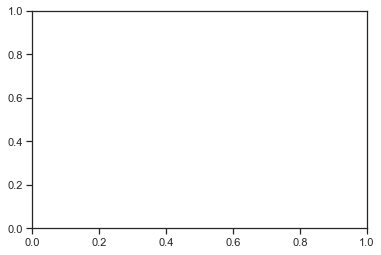

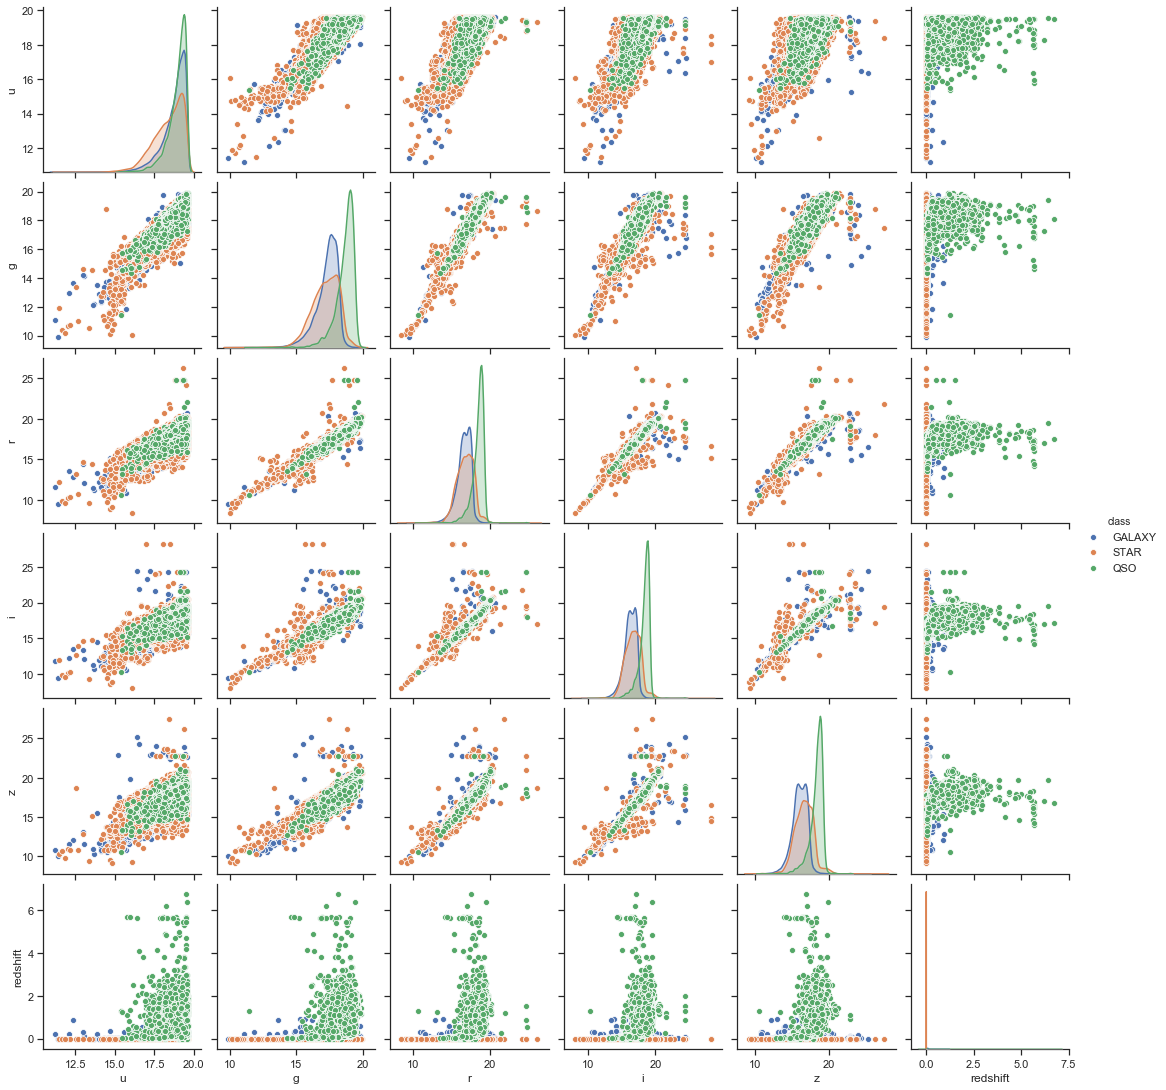

In [22]:
# let's explore train set
plt.close(fig3)
sns.set(style="ticks")
fig5, ax5 = plt.subplots()

sky_train_sample = sky_train.sample(n=int(0.1*sky_train.shape[0]))
ax5 = sns.pairplot(sky_train_sample, hue="class")

As it can be seen, light columns (u,g,r,i,z) are strongly correlated with each other. We will combine these columns by substracting the longer wavelength from the shorter wavelenth (this creates what is known in astronomy as **Color Index**).

Also, the redshift is completely right skewed, so we will make the logarithm of it (just as before).

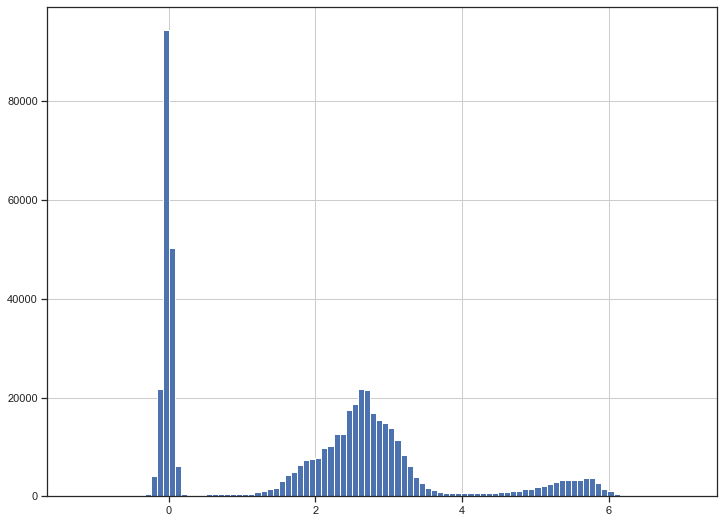

In [18]:
plt.close(fig5)
fig6 = plt.figure(figsize = (12,9))
ax6 = fig6.add_subplot(111)
sky['redshift'].apply(lambda x :math.log((x+0.006)/0.006)).hist(bins=100)

In [19]:
# define a function to transform some columns and make the logarithm of redshift (to be used in preprocessing pipeline)
def clean_ci_redshift(df):
    df_copy = df.copy()
    df_copy['color_index_u_g'] = df_copy['u'] - df_copy['g']
    df_copy['color_index_g_r'] = df_copy['g'] - df_copy['r']
    df_copy['color_index_r_i'] = df_copy['r'] - df_copy['i']
    df_copy['color_index_i_z'] = df_copy['i'] - df_copy['z']
    df_copy['redshift_log'] = np.log((df_copy['redshift']+0.006)/0.006)
    df_copy = df_copy.drop(['u','g','r','i','z','redshift'], axis = 1)
    return df_copy

sky_train_clean = clean_ci_redshift(sky_train)

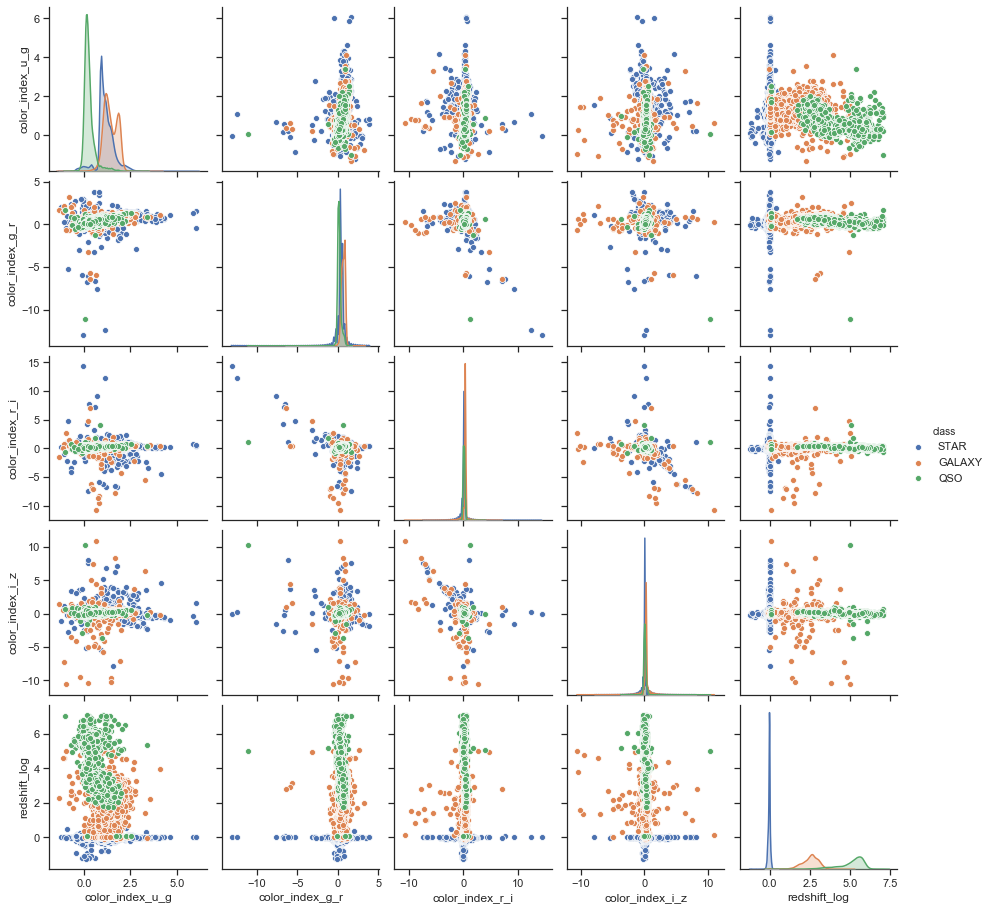

In [20]:
plt.close(fig6)
fig7, ax7 = plt.subplots()
sns.pairplot(sky_train_clean.sample(n=int(0.1*sky_train.shape[0])), hue="class")
plt.close(fig7)

We will use this transformation for now to preprocess the training data.

In [23]:
# export data split to CSV

sky_train.to_csv('../data/sky_train.csv')
sky_test.to_csv('../data/sky_test.csv')